# Project: Understanding and Predicting Employee Turnover

A case study in prescriptive analytics.

### Project Statement

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to:

1. Perform data quality check by checking for missing values if any.
2. Understand what factors contributed most to employee turnover by EDA.
3. Perform clustering of Employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance. 
6. Identify the best model and justify the evaluation metrics used. 
7. Suggest various retention strategies for targeted employees.


Data source: `HR.csv`

| Column Name             | Description                                                   |
|-------------------------|---------------------------------------------------------------|
| satisfaction_level      | satisfaction level at the job of an employee                   |
| last_evaluation         | Rating between 0 to 1, received by an employee at his last evaluation |
| number_project          | Number of projects, an employee involved in                    |
| average_montly_hours    | Average number of hours in a month, spent by an employee at office |
| time_spend_company      | Number of years spent in the company                           |
| Work_accident           | 0 - no accident during employee stay, 1 - accident during employee stay |
| left                    | 0 indicates employee stays in the company, 1 indicates - employee left the company |
| promotion_last_5years   | Number of promotions in his stay                              |
| Department              | Department, an employee belongs to                            |
| salary                  | Salary in USD                                                 |

### We'll be covering:
- **Descriptive Analytics** - What happened?
- **Predictive Analytics** - What might happen?
- **Prescriptive Analytics** - What should we do?


***
### Objective: 
- To understand what factors contributed most to employee turnover.
- To perform clustering of Employees who left based on their satisfaction and evaluation
- To create a model that predicts the likelihood if a certain employee will leave the company or not. 
- To create or improve different retention strategies on targeted employees. 

## Steps

### 1. Perform a data quality check to identify any missing values.


### 2. Conduct exploratory data analysis (EDA) to determine the main factors contributing to employee turnover.
   1. Generate a heatmap of the correlation matrix for all numerical features/columns in the dataset.
   1. Plot the distribution of the following variables:
      - Employee Satisfaction (using the "satisfaction_level" column)
      - Employee Evaluation (using the "last_evaluation" column)
      - Average Monthly Hours (using the "average_montly_hours" column)
   1. Create a bar plot showing the Employee Project Count for both employees who left and those who stayed in the organization (using the "number_project" column and the "left" column as the hue). Provide insights based on the plot.


### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
   1. Select the columns "satisfaction_level", "last_evaluation", and "left".
   1. Apply KMeans clustering to the employees who left the company, dividing them into 3 clusters.
   1. Based on the satisfaction and evaluation factors, analyze and describe the characteristics of each employee cluster.


### 4. Address the class imbalance in the "left" variable using the SMOTE technique.
   1. Pre-process the data by converting categorical columns to numerical columns:
      - Separate categorical variables from numeric variables.
      - Apply the get_dummies() function to encode the categorical variables.
      - Combine the categorical and numeric variables.
   1. Split the dataset into training and testing sets using a stratified 80:20 ratio with a random state of 123.
   1. Use the SMOTE technique from the imblearn module to upsample the training dataset.


### 5. Perform 5-fold cross-validation for model training and performance evaluation.
   1. Train a Logistic Regression model and apply 5-fold cross-validation. Plot the classification report.
   1. Train a Random Forest Classifier model and apply 5-fold cross-validation. Plot the classification report.
   1. Train a Gradient Boosting Classifier model and apply 5-fold cross-validation. Plot the classification report.


### 6. Determine the best model and justify the evaluation metrics used.
   1. Calculate the ROC/AUC for each model and plot the ROC curves.
   1. Compute the confusion matrix for each model.
   1. Based on the confusion matrix, explain whether Recall or Precision should be prioritized.


### 7. Provide various retention strategies for targeted employees.
   1. Use the best model to predict the probability of employee turnover in the test data.
   1. Categorize employees into four zones based on the probability scores and suggest appropriate retention strategies for each zone:
      - Safe Zone (Green) (Score < 20%)
      - Low Risk Zone (Yellow) (20% < Score < 60%)
      - Medium Risk Zone (Orange) (60% < Score < 90%)
      - High Risk Zone (Red) (Score > 90%).

### Perform a data quality check to identify any missing values.

In [102]:
import pandas as pd
import numpy as np

df = pd.read_csv('HR.csv')

df.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [103]:
missing_values = df.isna().sum()
missing_values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

### Conduct exploratory data analysis (EDA) to determine the main factors contributing to employee turnover.
   1. Generate a heatmap of the correlation matrix for all numerical features/columns in the dataset.


In [104]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

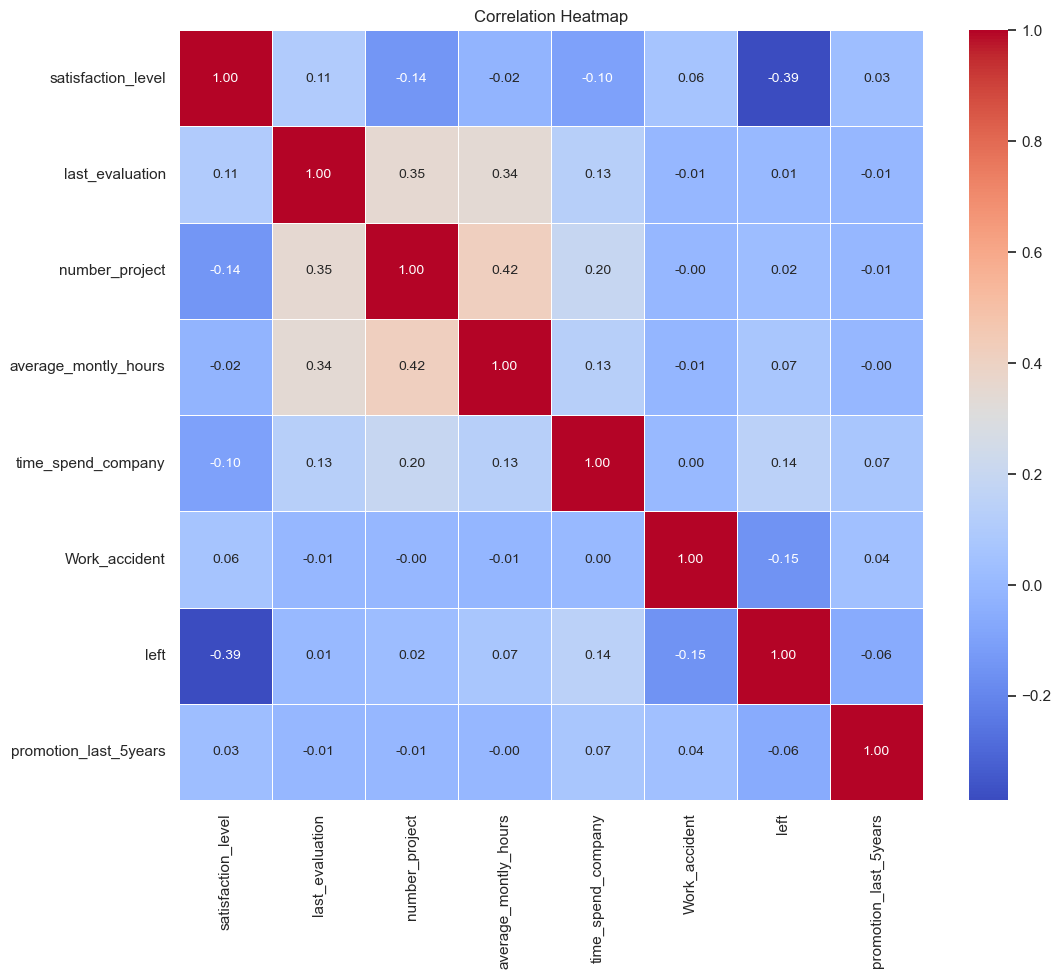

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns]

corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()


   1. Plot the distribution of the following variables:
      - Employee Satisfaction (using the "satisfaction_level" column)
      - Employee Evaluation (using the "last_evaluation" column)
      - Average Monthly Hours (using the "average_montly_hours" column)

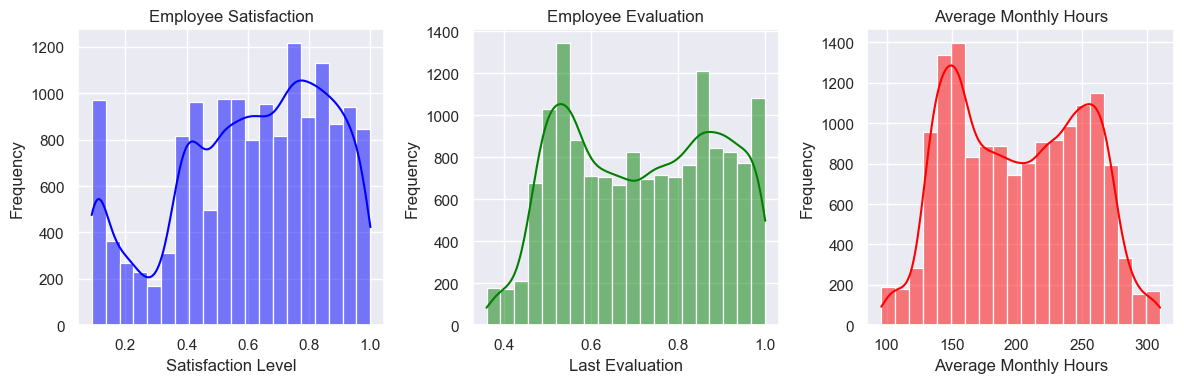

In [137]:
sns.set(style="darkgrid")

# 2. Create histograms for the specified variables
# Set the number of bins and other parameters as needed
plt.figure(figsize=(12, 4))  # Adjust the figure size if necessary

# Employee Satisfaction (satisfaction_level)
plt.subplot(131)
sns.histplot(df['satisfaction_level'], bins=20, kde=True, color='blue')
plt.title('Employee Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Employee Evaluation (last_evaluation)
plt.subplot(132)
sns.histplot(df['last_evaluation'], bins=20, kde=True, color='green')
plt.title('Employee Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')

# Average Monthly Hours (average_montly_hours)
plt.subplot(133)
sns.histplot(df['average_montly_hours'], bins=20, kde=True, color='red' )
plt.title('Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Frequency')
plt.tight_layout();


1. Create a bar plot showing the Employee Project Count for both employees who left and those who stayed in the organization (using the "number_project" column and the "left" column as the hue). Provide insights based on the plot.

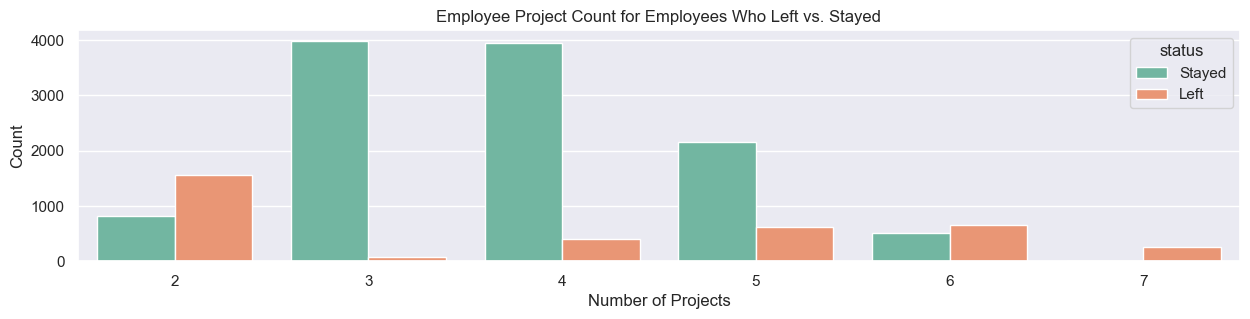

In [132]:
sns.set(style="darkgrid") 

plt.figure(figsize=(15, 3))  

# Use Seaborn to create the bar plot
sns.countplot(data=df, x="number_project", hue="left", palette="Set2")

plt.title('Employee Project Count for Employees Who Left vs. Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='status', labels=['Stayed', 'Left'])

plt.show()

### The x-axis represents the "Number of Projects," and the y-axis represents the count of employees.
* The bars are split by color to show employees who stayed (blue) and employees who left (orange).
* You can observe the distribution of project counts for both groups.
* Insights could include understanding whether employees with a specific number of projects are more likely to leave the organization. For example, you might notice that employees with a very low or very high number of projects are more likely to leave. This information can be valuable for HR and management decisions.

### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
   1. Select the columns "satisfaction_level", "last_evaluation", and "left".
   1. Apply KMeans clustering to the employees who left the company, dividing them into 3 clusters.
   1. Based on the satisfaction and evaluation factors, analyze and describe the characteristics of each employee cluster.

   1. Select the columns "satisfaction_level", "last_evaluation", and "left".


c:\Users\abubakr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1 Characteristics:
 - Satisfaction Level Mean: 0.41
 - Last Evaluation Mean: 0.52
 - Number of Employees in Cluster: 1667

Cluster 2 Characteristics:
 - Satisfaction Level Mean: 0.81
 - Last Evaluation Mean: 0.92
 - Number of Employees in Cluster: 965

Cluster 3 Characteristics:
 - Satisfaction Level Mean: 0.11
 - Last Evaluation Mean: 0.87
 - Number of Employees in Cluster: 939



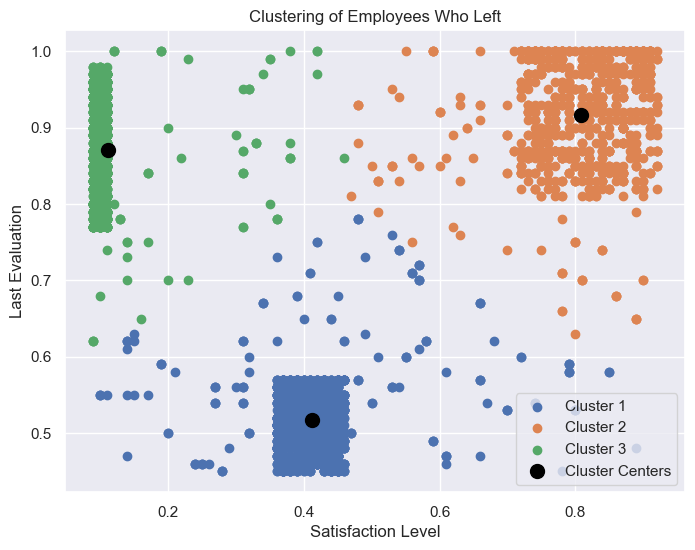

In [108]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


left_employees = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

# the mean = 0 and the standerDV = 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(left_employees)

k = 3
# 4. Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original DataFrame for left employees
left_employees['left cluster'] = kmeans.labels_

# 5. Analyze and describe the characteristics of each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Rescale the cluster centers

# Print cluster center characteristics
for i in range(k):
    cluster_center = cluster_centers[i]
    print(f"Cluster {i + 1} Characteristics:")
    print(f" - Satisfaction Level Mean: {cluster_center[0]:.2f}")
    print(f" - Last Evaluation Mean: {cluster_center[1]:.2f}")
    print(f" - Number of Employees in Cluster: {len(left_employees[left_employees['left cluster'] == i])}\n")

# You can also visualize the clusters to better understand them
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(left_employees[left_employees['left cluster'] == i]['satisfaction_level'],
                left_employees[left_employees['left cluster'] == i]['last_evaluation'],
                label=f'Cluster {i + 1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='black', label='Cluster Centers')
plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

### 4. Address the class imbalance in the "left" variable using the SMOTE technique.
   1. Pre-process the data by converting categorical columns to numerical columns:
      - Separate categorical variables from numeric variables.
      - Apply the get_dummies() function to encode the categorical variables.
      - Combine the categorical and numeric variables.
   1. Split the dataset into training and testing sets using a stratified 80:20 ratio with a random state of 123.
   1. Use the SMOTE technique from the imblearn module to upsample the training dataset.


In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


categorical_columns = ['sales', 'salary']
df= pd.get_dummies(df , categorical_columns )





In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_IT               14999 non-null  uint8  
 9   sales_RandD            14999 non-null  uint8  
 10  sales_accounting       14999 non-null  uint8  
 11  sales_hr               14999 non-null  uint8  
 12  sales_management       14999 non-null  uint8  
 13  sales_marketing        14999 non-null  uint8  
 14  sales_product_mng      14999 non-null  uint8  
 15  sa

   1. Split the dataset into training and testing sets using a stratified 80:20 ratio with a random state of 123.


In [115]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="left"), df['left'], test_size=0.2,  random_state=123)

   1. Use the SMOTE technique from the imblearn module to upsample the training dataset.


In [116]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=123)  # You can adjust 'sampling_strategy' if needed

# Upsample the training dataset using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# X_train_resampled and y_train_resampled now contain the upsampled training data.

### 5. Perform 5-fold cross-validation for model training and performance evaluation.
   1. Train a Logistic Regression model and apply 5-fold cross-validation. Plot the classification report.
   1. Train a Random Forest Classifier model and apply 5-fold cross-validation. Plot the classification report.
   1. Train a Gradient Boosting Classifier model and apply 5-fold cross-validation. Plot the classification report.


   1. Train a Logistic Regression model and apply 5-fold cross-validation. Plot the classification report.


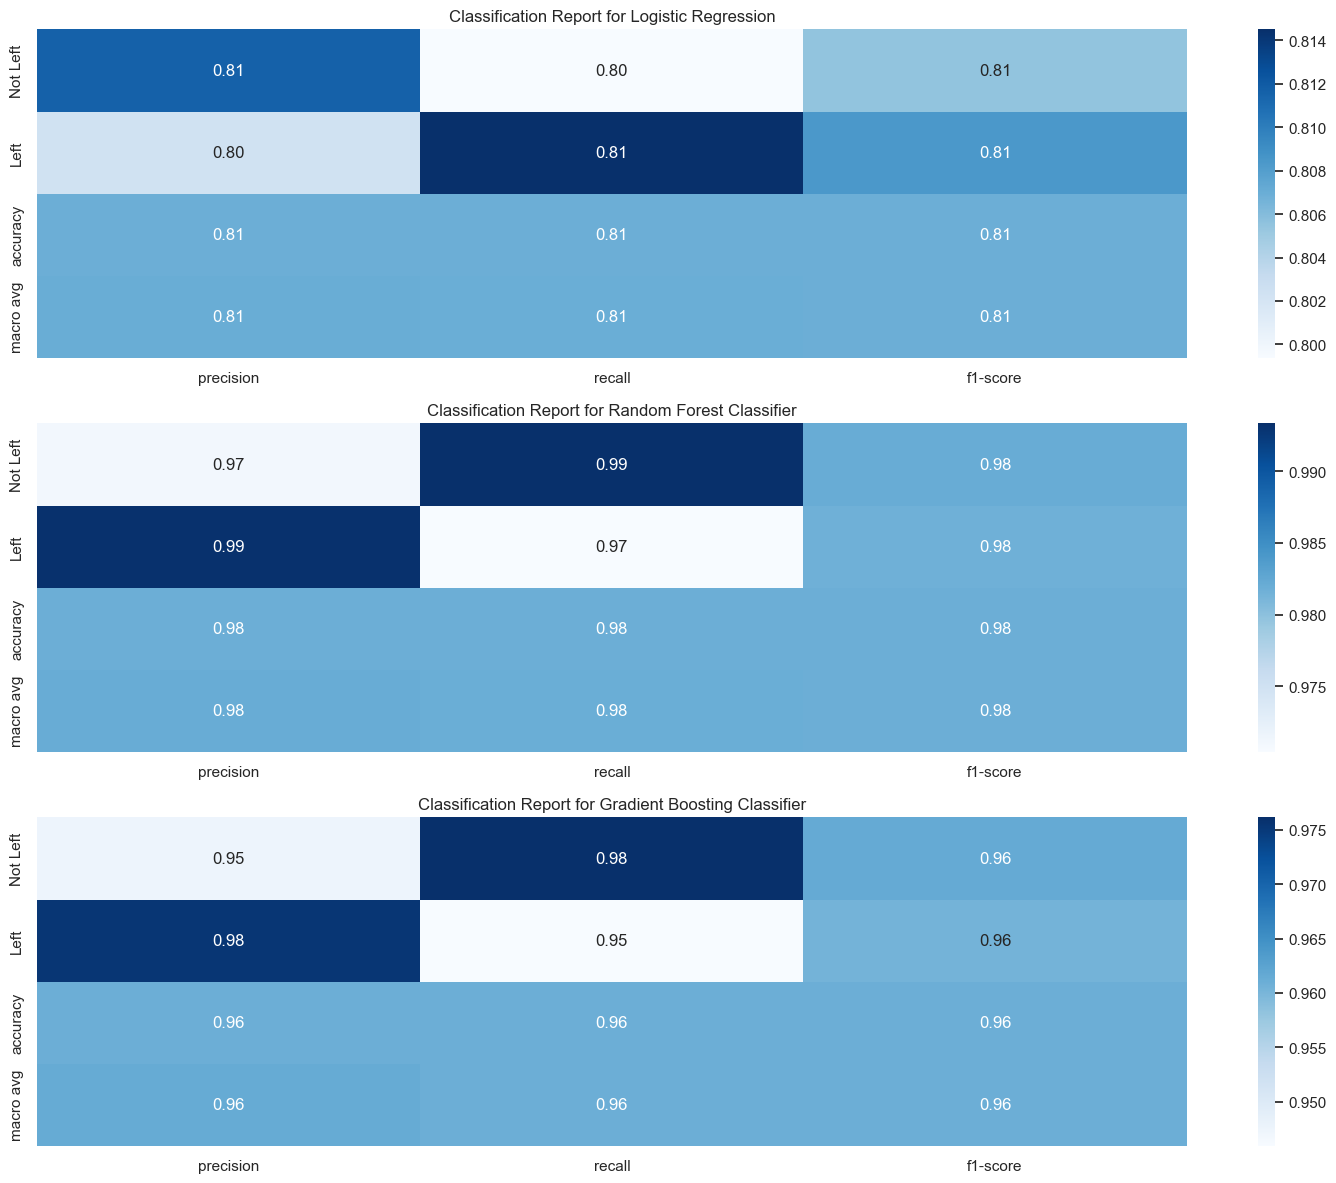

,precision,recall,f1-score,support
Not Left,0.947519,0.976141,0.961617,9137.000000
Left,0.975398,0.945934,0.960440,9137.000000
accuracy,0.961038,0.961038,0.961038,0.961038
macro avg,0.961459,0.961038,0.961029,18274.000000
weighted avg,0.961459,0.961038,0.961029,18274.000000


In [123]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Assuming you have X_train_resampled and y_train_resampled from the previous steps

# Create models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}

# Perform 5-fold cross-validation and generate classification reports
reports = {}

for model_name, model in models.items():
    predictions = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=5)
    report = classification_report(y_train_resampled, predictions, target_names=['Not Left', 'Left'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    reports[model_name] = report_df

# Plot the classification reports
plt.figure(figsize=(15, 12))
for i, (model_name, report_df) in enumerate(reports.items(), 1):
    plt.subplot(3, 1, i)
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'Classification Report for {model_name}')

plt.tight_layout()
plt.show()
reports[model_name]
